# Tutorial for NEON hyperspectral h5 data  

https://www.neonscience.org/resources/learning-hub/tutorials/neon-aop-hdf5-py

In [1]:
# Need these packages for write_cog function
#!pip install rio-cogeo==2.3.1
#!pip install rio-tiler==2.1.4

In [2]:
import numpy as np
import h5py
import osgeo
from osgeo import gdal, osr
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import glob
from glob import glob
import sys, os
sys.path.append('/home/pmontesa/code/icesat2_boreal/lib')
import rasterio as rio 

In [3]:
SITE = 'MLBS'
YEAR = 2017

In [4]:
maindir = '/explore/nobackup/projects/ilab/data/AGB/Airborne_Hyperspectral/DP3.30006.001/neon-aop-products'
search_path = f'/{YEAR}/FullSite/D*/{YEAR}_{SITE}_*/L3/Spectrometer/Reflectance/*.h5'
h5_fn_list = glob(maindir + search_path)

In [5]:
len(h5_fn_list)
fn = h5_fn_list[50]

In [6]:
f = h5py.File(fn,'r')

#list_dataset lists the names of datasets in an hdf5 file
def list_dataset(name,node):
    if isinstance(node, h5py.Dataset):
        print(name)

f.visititems(list_dataset)

MLBS/Reflectance/Metadata/Ancillary_Imagery/Aerosol_Optical_Depth
MLBS/Reflectance/Metadata/Ancillary_Imagery/Aspect
MLBS/Reflectance/Metadata/Ancillary_Imagery/Cast_Shadow
MLBS/Reflectance/Metadata/Ancillary_Imagery/Dark_Dense_Vegetation_Classification
MLBS/Reflectance/Metadata/Ancillary_Imagery/Data_Selection_Index
MLBS/Reflectance/Metadata/Ancillary_Imagery/Haze_Cloud_Water_Map
MLBS/Reflectance/Metadata/Ancillary_Imagery/Illumination_Factor
MLBS/Reflectance/Metadata/Ancillary_Imagery/Path_Length
MLBS/Reflectance/Metadata/Ancillary_Imagery/Sky_View_Factor
MLBS/Reflectance/Metadata/Ancillary_Imagery/Slope
MLBS/Reflectance/Metadata/Ancillary_Imagery/Smooth_Surface_Elevation
MLBS/Reflectance/Metadata/Ancillary_Imagery/Visibility_Index_Map
MLBS/Reflectance/Metadata/Ancillary_Imagery/Water_Vapor_Column
MLBS/Reflectance/Metadata/Ancillary_Imagery/Weather_Quality_Indicator
MLBS/Reflectance/Metadata/Coordinate_System/Coordinate_System_String
MLBS/Reflectance/Metadata/Coordinate_System/EPSG C

In [7]:
#ls_dataset displays the name, shape, and type of datasets in hdf5 file
def ls_dataset(name,node):
    if isinstance(node, h5py.Dataset):
        print(node)
    
f.visititems(ls_dataset)

<HDF5 dataset "Aerosol_Optical_Depth": shape (1000, 1000), type "<i2">
<HDF5 dataset "Aspect": shape (1000, 1000), type "<f4">
<HDF5 dataset "Cast_Shadow": shape (1000, 1000), type "|u1">
<HDF5 dataset "Dark_Dense_Vegetation_Classification": shape (1000, 1000), type "|u1">
<HDF5 dataset "Data_Selection_Index": shape (1000, 1000), type "<i4">
<HDF5 dataset "Haze_Cloud_Water_Map": shape (1000, 1000), type "|u1">
<HDF5 dataset "Illumination_Factor": shape (1000, 1000), type "|u1">
<HDF5 dataset "Path_Length": shape (1000, 1000), type "<f4">
<HDF5 dataset "Sky_View_Factor": shape (1000, 1000), type "|u1">
<HDF5 dataset "Slope": shape (1000, 1000), type "<f4">
<HDF5 dataset "Smooth_Surface_Elevation": shape (1000, 1000), type "<f4">
<HDF5 dataset "Visibility_Index_Map": shape (1000, 1000), type "|u1">
<HDF5 dataset "Water_Vapor_Column": shape (1000, 1000), type "<f4">
<HDF5 dataset "Weather_Quality_Indicator": shape (1000, 1000, 3), type "|u1">
<HDF5 dataset "Coordinate_System_String": shap

In [8]:
serc_refl = f[SITE]['Reflectance']
print(serc_refl)

<HDF5 group "/MLBS/Reflectance" (2 members)>


In [9]:
serc_reflArray = serc_refl['Reflectance_Data']
print(serc_reflArray)

<HDF5 dataset "Reflectance_Data": shape (1000, 1000, 426), type "<i2">


In [10]:
refl_shape = serc_reflArray.shape
print(f'{SITE} Reflectance Data Dimensions:',refl_shape)

MLBS Reflectance Data Dimensions: (1000, 1000, 426)


In [11]:
#View wavelength information and values

wavelengths = serc_refl['Metadata']['Spectral_Data']['Wavelength']
print(wavelengths)
# print(wavelengths.value)
# Display min & max wavelengths
print('min wavelength:', np.amin(wavelengths),'nm')
print('max wavelength:', np.amax(wavelengths),'nm')

#show the band width 
print('band width =',(wavelengths[1]-wavelengths[0]),'nm')
print('band width =',(wavelengths[-1]-wavelengths[-2]),'nm')

<HDF5 dataset "Wavelength": shape (426,), type "<f4">
min wavelength: 383.5343 nm
max wavelength: 2511.8945 nm
band width = 5.007904 nm
band width = 5.0078125 nm


In [12]:
serc_refl['Metadata']['Coordinate_System'].visititems(ls_dataset)

<HDF5 dataset "Coordinate_System_String": shape (), type "|O">
<HDF5 dataset "EPSG Code": shape (), type "|O">
<HDF5 dataset "Map_Info": shape (), type "|O">
<HDF5 dataset "Proj4": shape (), type "|O">


In [13]:
prj4 = serc_refl['Metadata']['Coordinate_System']['Proj4']
prj4_str = prj4[()].decode("utf-8")
prj4_str

'+proj=UTM +zone=17 +ellps=WGS84 +datum=WGS84 +units=m +no_defs'

In [14]:
serc_mapInfo = serc_refl['Metadata']['Coordinate_System']['Map_Info']
print(f'{SITE} Map Info:\n',serc_mapInfo)
print('\n',serc_mapInfo[()])
mapInfo_split  = str(serc_mapInfo[()]).split(',')
mapInfo_split

MLBS Map Info:
 <HDF5 dataset "Map_Info": shape (), type "|O">

 b'UTM,  1.000,  1.000,       539000.00,       4135000.0,       1.0000000,       1.0000000,  17,  North,  WGS-84,  units=Meters, 0'


["b'UTM",
 '  1.000',
 '  1.000',
 '       539000.00',
 '       4135000.0',
 '       1.0000000',
 '       1.0000000',
 '  17',
 '  North',
 '  WGS-84',
 '  units=Meters',
 " 0'"]

In [15]:
#Extract the resolution & convert to floating decimal number
res = float(mapInfo_split[5]),float(mapInfo_split[6])
print('Resolution:',res)

#Extract the upper left-hand corner coordinates from mapInfo
xMin = float(mapInfo_split[3]) 
yMax = float(mapInfo_split[4])
#Calculate the xMax and yMin values from the dimensions
#xMax = left corner + (# of columns * resolution)
xMax = xMin + (refl_shape[1]*res[0])
yMin = yMax - (refl_shape[0]*res[1]) 

# print('xMin:',xMin) ; print('xMax:',xMax) 
# print('yMin:',yMin) ; print('yMax:',yMax) 
serc_ext = (xMin, xMax, yMin, yMax)
print('serc_ext:',serc_ext)

#Can also create a dictionary of extent:
serc_extDict = {}
serc_extDict['xMin'] = xMin
serc_extDict['xMax'] = xMax
serc_extDict['yMin'] = yMin
serc_extDict['yMax'] = yMax
print(f'{SITE} extDict:',serc_extDict)

Resolution: (1.0, 1.0)
serc_ext: (539000.0, 540000.0, 4134000.0, 4135000.0)
MLBS extDict: {'xMin': 539000.0, 'xMax': 540000.0, 'yMin': 4134000.0, 'yMax': 4135000.0}


In [18]:
print('b56 wavelngth:',wavelengths[56],"nanometers")
b56 = serc_reflArray[:,:,55].astype(np.float)
print('b56 type:',type(b56))
print('b56 shape:',b56.shape)
print('Band 56 Reflectance:\n',b56)
# plt.hist(b56.flatten())

b56 wavelngth: 663.9771 nanometers
b56 type: <class 'numpy.ndarray'>
b56 shape: (1000, 1000)
Band 56 Reflectance:
 [[152. 206. 178. ... 218. 204. 196.]
 [178. 127. 114. ... 212. 247. 218.]
 [142. 197. 122. ... 157. 174. 140.]
 ...
 [ 87.  52.  51. ... 268. 271. 309.]
 [146.  63. 105. ... 168. 316. 336.]
 [138. 136.  93. ... 126. 292. 336.]]


In [19]:
#View and apply scale factor and data ignore value
scaleFactor = serc_reflArray.attrs['Scale_Factor']
noDataValue = serc_reflArray.attrs['Data_Ignore_Value']
print('Scale Factor:',scaleFactor)
print('Data Ignore Value:',noDataValue)

b56[b56==int(noDataValue)]=np.nan
b56 = b56/scaleFactor
print('Cleaned Band 56 Reflectance:\n',b56)

Scale Factor: 10000.0
Data Ignore Value: -9999.0
Cleaned Band 56 Reflectance:
 [[0.0152 0.0206 0.0178 ... 0.0218 0.0204 0.0196]
 [0.0178 0.0127 0.0114 ... 0.0212 0.0247 0.0218]
 [0.0142 0.0197 0.0122 ... 0.0157 0.0174 0.014 ]
 ...
 [0.0087 0.0052 0.0051 ... 0.0268 0.0271 0.0309]
 [0.0146 0.0063 0.0105 ... 0.0168 0.0316 0.0336]
 [0.0138 0.0136 0.0093 ... 0.0126 0.0292 0.0336]]


Text(0, 0.5, 'Frequency')

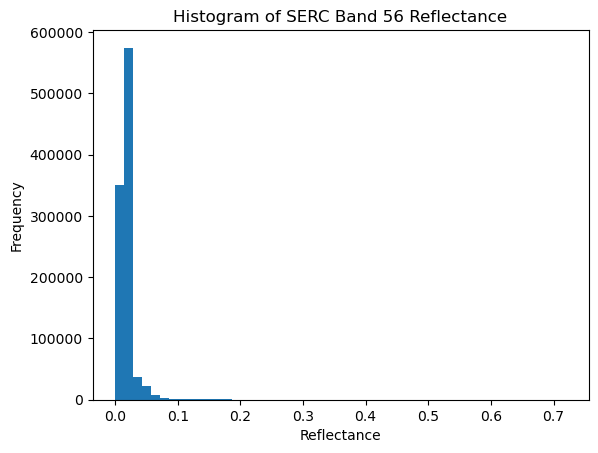

In [20]:
plt.hist(b56[~np.isnan(b56)],50);
plt.title('Histogram of SERC Band 56 Reflectance')
plt.xlabel('Reflectance'); plt.ylabel('Frequency')

# NDVI calc

In [16]:
# NDVI calc band: (835 - 660) / (835 + 660)
for bnum in [56,90]:
    print(f'Band {bnum} wavelngth:',wavelengths[bnum],"nanometers")

Band 56 wavelngth: 663.9771 nanometers
Band 90 wavelngth: 834.2459 nanometers


In [33]:
b90 = serc_reflArray[:,:,90].astype(np.float)
b56 = serc_reflArray[:,:,56].astype(np.float)

# calc NDVI
ndvi = (b90 - b56) / (b90 + b56)

print('NDVI type:',type(ndvi))
print('NDVI shape:',ndvi.shape)
print('NDVI array:\n',ndvi)

NDVI type: <class 'numpy.ndarray'>
NDVI shape: (1000, 1000)
NDVI array:
 [[0.93217784 0.90861559 0.91822828 ... 0.91438864 0.91540785 0.90541977]
 [0.93449531 0.93466523 0.93839836 ... 0.90375123 0.90519878 0.90909091]
 [0.92921318 0.92601156 0.94275845 ... 0.92522876 0.91833423 0.9204722 ]
 ...
 [0.9502832  0.96590469 0.96622152 ... 0.92467096 0.92476402 0.92031334]
 [0.93506494 0.96198522 0.94239631 ... 0.93223211 0.92337461 0.9182252 ]
 [0.93708199 0.93884807 0.94950463 ... 0.93910175 0.92531457 0.92167555]]


## Plot 1 selected band

In [39]:
band = ndvi #b56#
BANDNAME = 'NDVI' #'b56'#''

b56CLIM = (0,0.07)
ndviCLIM = (0.8,0.95)

CLIM = ndviCLIM

(0.8, 0.95)

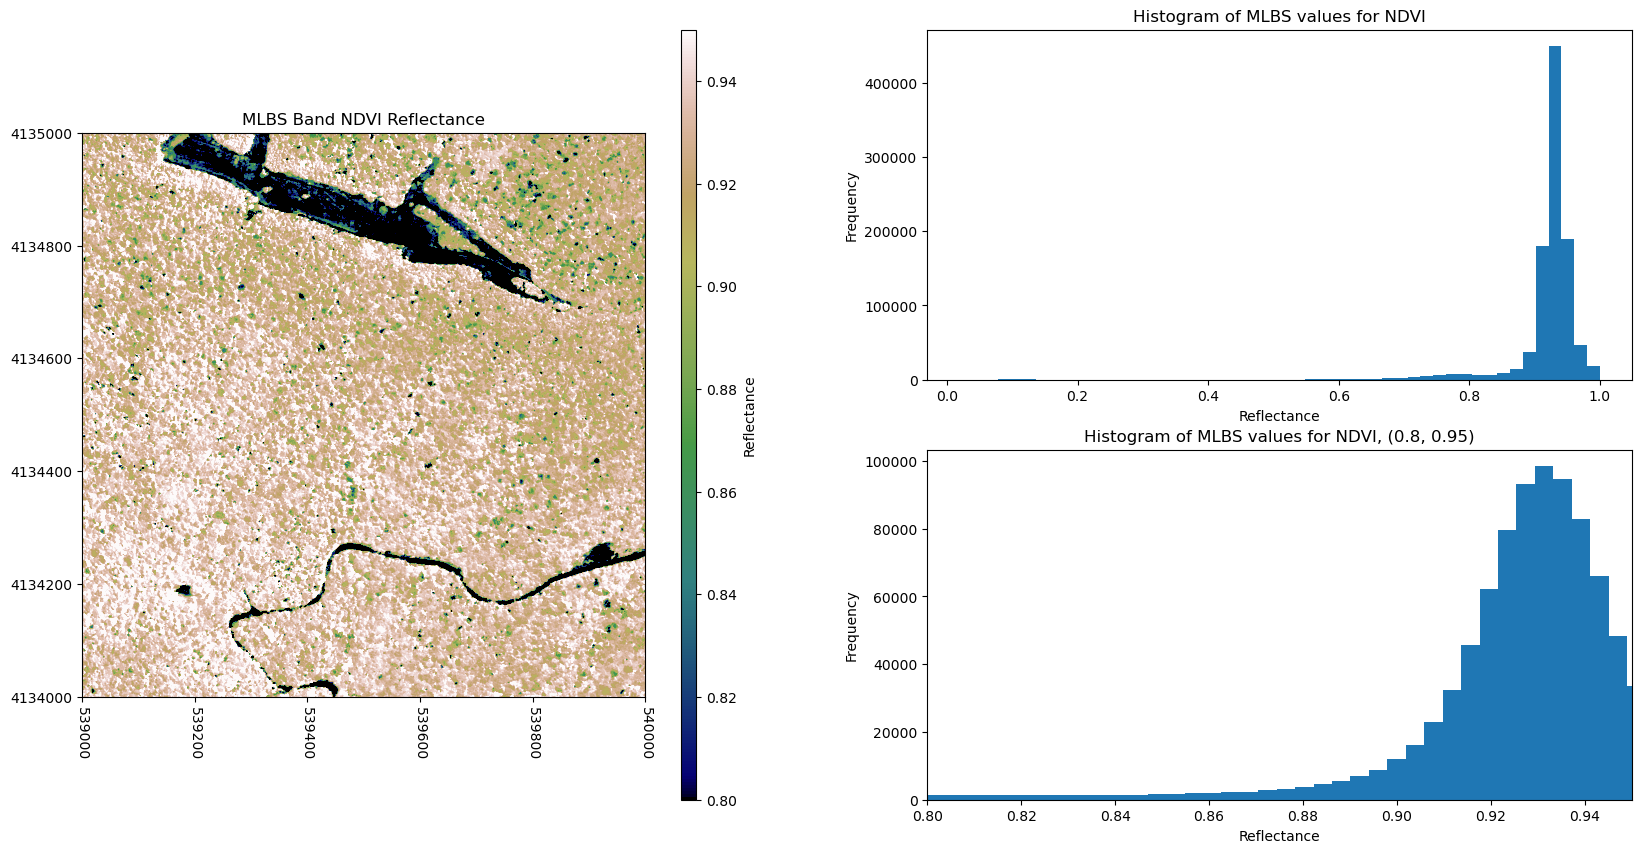

In [41]:
serc_fig = plt.figure(figsize=(20,10))
ax1 = serc_fig.add_subplot(1,2,1)

serc_plot = ax1.imshow(band,extent=serc_ext,cmap='gist_earth',clim=CLIM) 
#serc_plot = ax1.imshow(band,extent=serc_ext,cmap='jet') 
cbar = plt.colorbar(serc_plot,aspect=50); cbar.set_label('Reflectance')
plt.title(f'{SITE} Band {BANDNAME} Reflectance'); #ax = plt.gca(); 
ax1.ticklabel_format(useOffset=False, style='plain') #do not use scientific notation #
rotatexlabels = plt.setp(ax1.get_xticklabels(),rotation=270) #rotate x tick labels 90 degree

#  plot histogram of reflectance values (with 50 bins)
ax2 = serc_fig.add_subplot(2,2,2)
ax2.hist(band[~np.isnan(band)],50); 
plt.title(f'Histogram of {SITE} values for {BANDNAME}')
plt.xlabel('Reflectance'); plt.ylabel('Frequency')

# plot histogram, zooming in on values < 0.1
ax3 = serc_fig.add_subplot(2,2,4)
ax3.hist(band[~np.isnan(band)],250); 
plt.title(f'Histogram of {SITE} values for {BANDNAME}, {CLIM}')
plt.xlabel('Reflectance'); plt.ylabel('Frequency')
ax3.set_xlim(list(CLIM))

In [23]:
serc_extDict['xMin']

539000.0

In [24]:
def calc_clip_index(clipExtent, fullExtent, xscale=1, yscale=1):
    
    h5rows = fullExtent['yMax'] - fullExtent['yMin']
    h5cols = fullExtent['xMax'] - fullExtent['xMin']    
    
    indExtent = {}
    indExtent['xMin'] = round((clipExtent['xMin']-fullExtent['xMin'])/xscale)
    indExtent['xMax'] = round((clipExtent['xMax']-fullExtent['xMin'])/xscale)
    indExtent['yMax'] = round(h5rows - (clipExtent['yMin']-fullExtent['yMin'])/xscale)
    indExtent['yMin'] = round(h5rows - (clipExtent['yMax']-fullExtent['yMin'])/yscale)

    return indExtent

### Do a subset
a 200 x 200 pixel box starting from the lower left

In [25]:
print(f'{SITE} extent:',serc_extDict)

sub_sz = 200
clipExtent = {}
clipExtent['xMin'] = serc_extDict['xMin']
clipExtent['xMax'] = serc_extDict['xMin']+sub_sz
clipExtent['yMin'] = serc_extDict['yMin']
clipExtent['yMax'] = serc_extDict['yMin']+sub_sz
print(f'{SITE} Subset clip extent:',clipExtent)
serc_subInd = calc_clip_index(clipExtent,serc_extDict)
print(f'{SITE} Subset Index:',serc_subInd)

MLBS extent: {'xMin': 539000.0, 'xMax': 540000.0, 'yMin': 4134000.0, 'yMax': 4135000.0}
MLBS Subset clip extent: {'xMin': 539000.0, 'xMax': 539200.0, 'yMin': 4134000.0, 'yMax': 4134200.0}
MLBS Subset Index: {'xMin': 0, 'xMax': 200, 'yMax': 1000, 'yMin': 800}


In [26]:
serc_subArray = serc_reflArray[serc_subInd['yMin']:serc_subInd['yMax'],serc_subInd['xMin']:serc_subInd['xMax'],:]
serc_subExt = (clipExtent['xMin'],clipExtent['xMax'],clipExtent['yMin'],clipExtent['yMax'])
print(f'{SITE} Reflectance Subset Dimensions:',serc_subArray.shape)

MLBS Reflectance Subset Dimensions: (200, 200, 426)


In [27]:
serc_b56_subset = serc_subArray[:,:,55].astype(np.float)
serc_b56_subset[serc_b56_subset==int(noDataValue)]=np.nan
serc_b56_subset = serc_b56_subset/scaleFactor
#print(serc_b56_subset)

In [28]:
print(f'{SITE} Subsetted Band 56 Reflectance Stats:')
print('min reflectance:',np.nanmin(serc_b56_subset))
print('mean reflectance:',round(np.nanmean(serc_b56_subset),2))
print('max reflectance:',round(np.nanmax(serc_b56_subset),2))

MLBS Subsetted Band 56 Reflectance Stats:
min reflectance: 0.0
mean reflectance: 0.01
max reflectance: 0.1


Text(0, 0.5, 'Frequency')

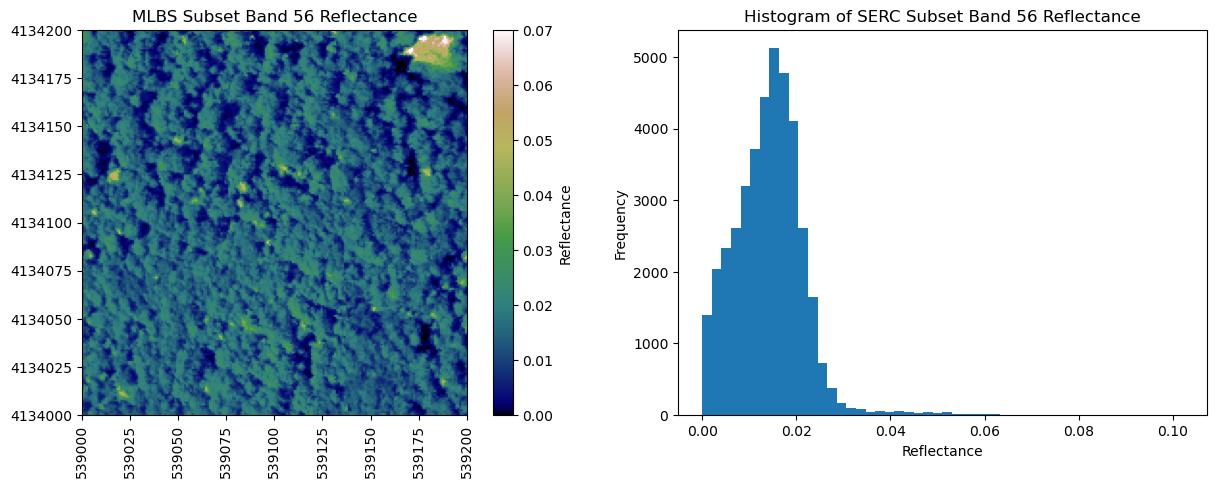

In [29]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
serc_subset_plot = plt.imshow(serc_b56_subset,extent=serc_subExt,cmap='gist_earth',clim=(0,0.07)) 
cbar = plt.colorbar(serc_subset_plot); cbar.set_label('Reflectance')
plt.title(f'{SITE} Subset Band 56 Reflectance'); 
ax1.ticklabel_format(useOffset=False, style='plain') #do not use scientific notation #
rotatexlabels = plt.setp(ax1.get_xticklabels(),rotation=90) #rotate x tick labels 90 degree

ax2 = fig.add_subplot(1,2,2)
plt.hist(serc_b56_subset[~np.isnan(serc_b56_subset)],50);
plt.title('Histogram of SERC Subset Band 56 Reflectance')
plt.xlabel('Reflectance'); plt.ylabel('Frequency')

### Calc NDVI

#### Write to geotiff using rasterio

In [30]:
clipExtent

{'xMin': 539000.0, 'xMax': 539200.0, 'yMin': 4134000.0, 'yMax': 4134200.0}

### Write with rasterio is buggy

TODO: get this working if needed

In [31]:
import rasterio
from rasterio.transform import from_origin

#arr = np.random.randint(5, size=(100,100)).astype(np.float)
arr = serc_b56_subset
print(arr.shape)

#origin is upper left
transform = from_origin(clipExtent['xMin'], clipExtent['yMax'], 0, 0)

# Set the profile for the in memory raster based on the ndarry stack
src_profile = dict(
        driver="GTiff",
        height=arr.shape[0],
        width=arr.shape[1],
        count=1,
        dtype=str(arr.dtype),
        crs=prj4_str,
        transform=src_transform,
        nodata=np.nan)

new_dataset = rasterio.open('/home/pmontesa/test3.tif', 'w', driver='GTiff',
                            height = arr.shape[0], width = arr.shape[1],
                            count=1, dtype=str(arr.dtype),
                            crs = prj4_str,
                            transform=transform)

new_dataset.write(arr, 1)
new_dataset.close()

(200, 200)


NameError: name 'src_transform' is not defined